<a href="https://colab.research.google.com/github/brainmentorspvtltd/MSIT_FDP_DeepLearning/blob/main/Unet_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Lambda, Conv2Dan
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
from glob import glob
import cv2  

In [ ]:
os.environ['KAGGLE_USERNAME'] = "brainmentors"
os.environ['KAGGLE_KEY'] = "7eb341d83afe651be2cd1ae2004a187b"

!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 98% 702M/714M [00:15<00:00, 69.5MB/s]
100% 714M/714M [00:16<00:00, 45.5MB/s]


In [ ]:
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

In [ ]:
mask_files = glob("/content/lgg-mri-segmentation/kaggle_3m/*/*_mask*")
mask_files

['/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_4_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_22_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_23_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_11_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_20_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_40_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_35_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_24_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_7_mask.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_12_mask.tif',
 '

In [ ]:
! zip zip.zip /content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909 

  adding: content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/ (stored 0%)


In [ ]:
train_files = [file.replace("_mask", "") for file in mask_files]
train_files

['/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_4.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_22.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_23.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_11.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_20.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_40.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_35.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_24.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_7.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_12.tif',
 '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_73

In [ ]:
# 2 images --> actual --> brain scan
# another is mask to detect tumor


In [ ]:
def diagnosis(mask_path):
  value = np.max(cv2.imread(mask_path))
  return '1' if value > 0 else '0'

df = pd.DataFrame({"image_path": train_files,
                   "mask_path": mask_files, 
                   "diagnosis": [diagnosis(x) for x in mask_files]})

In [ ]:
df.head()

,image_path,mask_path,diagnosis
0,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
1,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,1
2,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,1
3,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
4,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,/content/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0


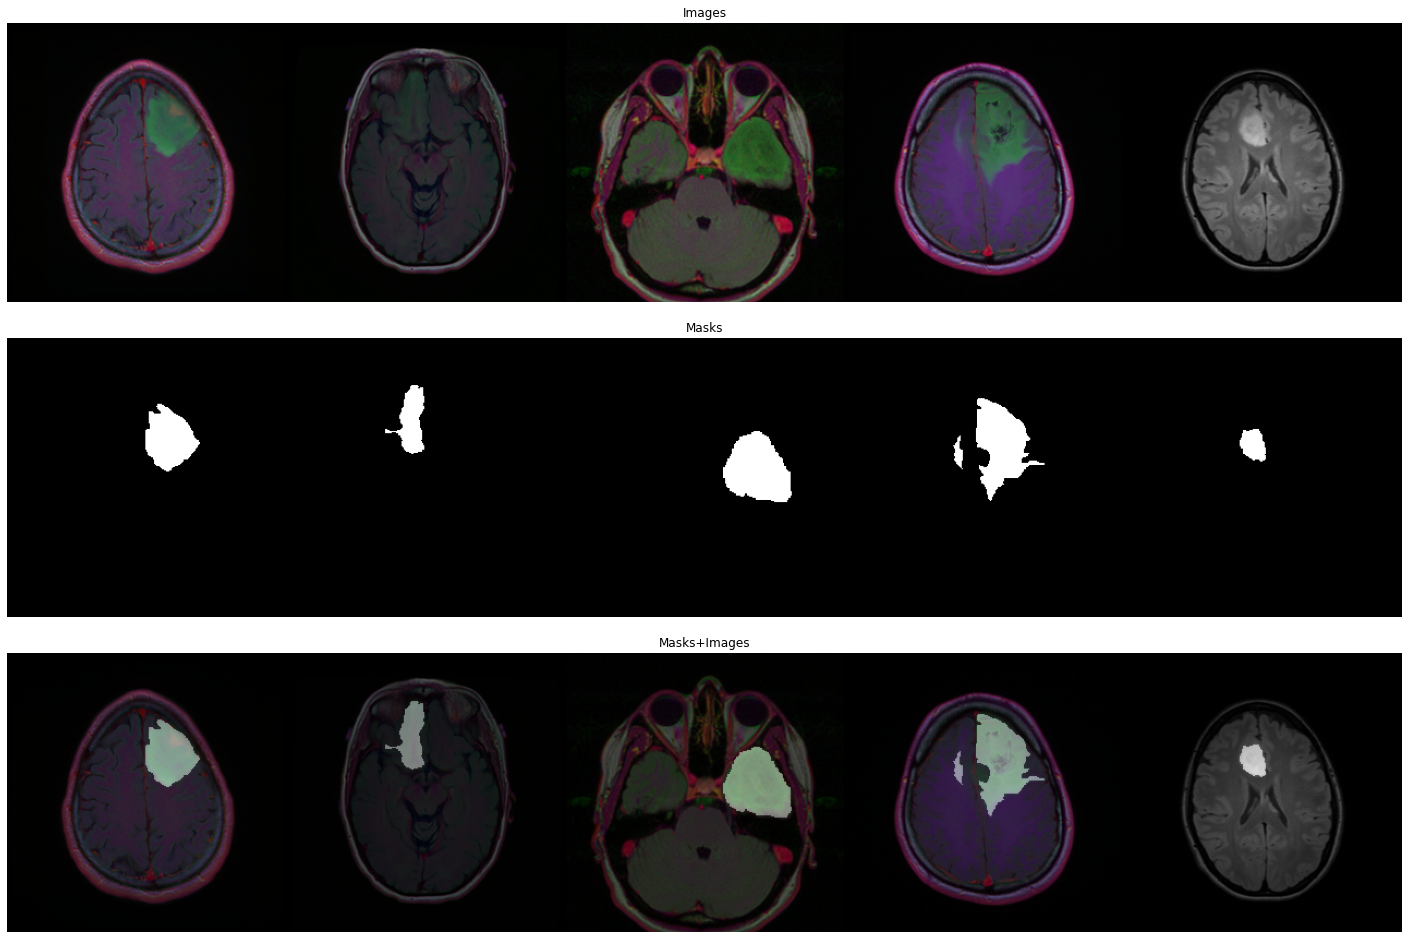

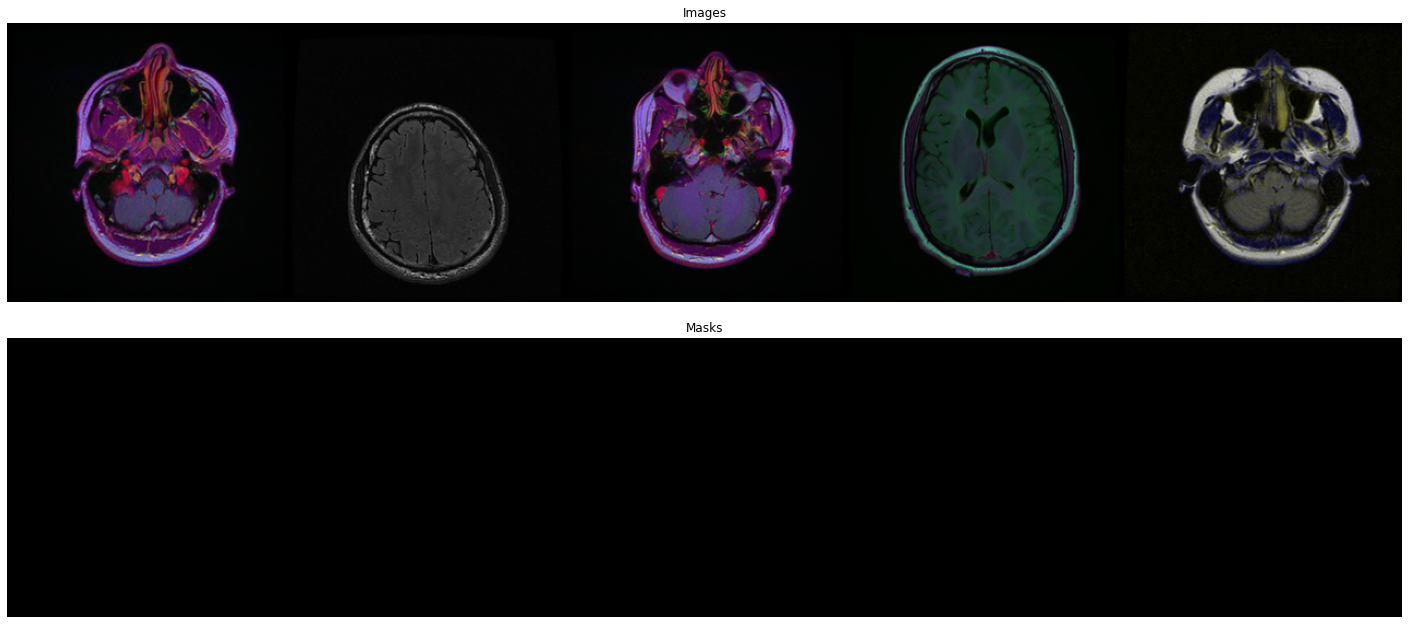

In [ ]:
df_positive = df[df['diagnosis']=='1'].sample(5).values
df_negative = df[df['diagnosis']=='0'].sample(5).values

def show_data(df, positive=True):
  images = []
  masks = []
  for data in df:
    img = cv2.imread(data[0])
    mask = cv2.imread(data[1])
    images.append(img)
    masks.append(mask)
  images = np.hstack(np.array(images))
  masks = np.hstack(np.array(masks))

  fig = plt.figure(figsize=(25, 25))
  if positive:
    grid = ImageGrid(fig, 111, nrows_ncols=(3, 1), axes_pad=0.5)
  else:
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 1), axes_pad=0.5)
  
  grid[0].imshow(images)
  grid[0].set_title('Images')
  grid[0].axis("off")
  grid[1].imshow(masks)
  grid[1].set_title('Masks')
  grid[1].axis("off")
  if positive:
    grid[2].imshow(images)
    grid[2].imshow(masks, alpha=0.4)
    grid[2].set_title('Masks+Images')
    grid[2].axis("off")
  
show_data(df_positive)
show_data(df_negative, positive=False)


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.15)
df_train, df_val = train_test_split(df_train, test_size=0.15)
print(df_train.shape, df_test.shape, df_val.shape)

(2838, 3) (590, 3) (501, 3)


In [ ]:
def train_generator(data_frame, batch_size, target_size=(256,256)):
  img_datagen = ImageDataGenerator()
  mask_datagen = ImageDataGenerator()

  img_generator = img_datagen.flow_from_dataframe(data_frame, x_col="image_path",
                                                  target_size=target_size,
                                                  class_mode=None,
                                                  batch_size=batch_size)
  
  mask_generator = mask_datagen.flow_from_dataframe(data_frame, x_col="mask_path",
                                                  target_size=target_size,
                                                  class_mode=None,
                                                  batch_size=batch_size)
  
  train_gen = zip(img_generator, mask_generator)
  
  for img, mask in train_gen:
    img, mask = adjust_data(img, mask)
    yield (img, mask)

def adjust_data(img, mask):
  img = img / 255.
  mask = mask / 255.
  mask[mask > 0.5] = 1
  mask[mask <= 0.5] = 0

  return (img, mask)

In [ ]:
def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation('relu')(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation('relu')(bn5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation('relu')(bn6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation('relu')(bn7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation('relu')(bn8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation('relu')(bn9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
batch_size = 32
IMAGE_SIZE = (256, 256)
train_gen = train_generator(df_train, batch_size)
val_gen = train_generator(df_val, batch_size)

model = unet(input_size = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_gen, epochs=5, validation_data = val_gen)

Found 2838 validated image filenames.
Found 2838 validated image filenames.
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


      1/Unknown - 141s 141s/step - loss: 0.5563 - accuracy: 0.7643